host_response_rate: the response rate of the host

host_acceptance_rate: number of requests to the host that convert to rentals

host_listings_count: number of other listings the host has

latitude: latitude dimension of the geographic coordinates

longitude: longitude part of the coordinates

city: the city the living space resides

zipcode: the zip code the living space resides

state: the state the living space resides

accommodates: the number of guests the rental can accommodate

room_type: the type of living space (Private room, Shared room or Entire home/apt

bedrooms: number of bedrooms included in the rental

bathrooms: number of bathrooms included in the rental

beds: number of beds included in the rental

price: nightly price for the rental

cleaning_fee: additional fee used for cleaning the living space after the guest leaves

security_deposit: refundable security deposit, in case of damages

minimum_nights: minimum number of nights a guest can stay for the rental

maximum_nights: maximum number of nights a guest can stay for the rental

number_of_reviews: number of reviews that previous guests have left

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
d_frame=pd.read_csv(data source)
d_frame.head(3)
# Each row in the dataset is a specific listing that's available for renting on AirBnB in the Washington, D.C. area.

,host_response_rate,host_acceptance_rate,host_listings_count,city,state,zipcode,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews
0,92%,91%,26,Washington,DC,20003,38.890046,-77.002808,Entire home/apt,4,1.0,1.0,2.0,$160.00,$100.00,$115.00,1,1125,0
1,90%,100%,1,Washington,DC,20003,38.880413,-76.990485,Entire home/apt,6,3.0,3.0,3.0,$350.00,NaN,$100.00,2,30,65
2,90%,100%,2,Hyattsville,MD,20782,38.955291,-76.986006,Private room,1,2.0,1.0,1.0,$50.00,NaN,NaN,2,1125,1


In [2]:
d_frame.dtypes

host_response_rate       object
host_acceptance_rate     object
host_listings_count       int64
city                     object
state                    object
zipcode                  object
latitude                float64
longitude               float64
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
price                    object
security_deposit         object
cleaning_fee             object
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
dtype: object

In [3]:
null_columns=d_frame.columns[d_frame.isnull().any()]
d_frame[null_columns]
d_frame[null_columns].isnull().sum()

host_response_rate       434
host_acceptance_rate     614
zipcode                    9
bathrooms                 27
bedrooms                  21
beds                      11
security_deposit        2297
cleaning_fee            1388
dtype: int64

In [4]:
d_frame1=d_frame.drop(['security_deposit','cleaning_fee','zipcode'],axis=1)

In [5]:
# missing value percent
mis_val_percent = 100 * d_frame1.isnull().sum() / len(d_frame1)
mis_val_percent

host_response_rate      11.657266
host_acceptance_rate    16.492076
host_listings_count      0.000000
city                     0.000000
state                    0.000000
latitude                 0.000000
longitude                0.000000
room_type                0.000000
accommodates             0.000000
bathrooms                0.725222
bedrooms                 0.564061
beds                     0.295461
price                    0.000000
minimum_nights           0.000000
maximum_nights           0.000000
number_of_reviews        0.000000
dtype: float64

In [6]:
d_frame1['price']= d_frame1.price.str.replace(',','')
d_frame1['price']= d_frame1.price.str.replace('$','').astype(float)
d_frame1['price'].loc[367]     # previous it was 1,000 $

1000.0

In [7]:
d_frame1['host_response_rate']= d_frame1.host_response_rate.str.replace('%','').astype(float)
d_frame1['host_acceptance_rate']= d_frame1.host_acceptance_rate.str.replace('%','').astype(float)

In [8]:
d_frame1.mean().astype(int)

host_response_rate        91
host_acceptance_rate      86
host_listings_count       13
latitude                  38
longitude                -77
accommodates               3
bathrooms                  1
bedrooms                   1
beds                       1
price                    149
minimum_nights             2
maximum_nights          3491
number_of_reviews         15
dtype: int32

In [9]:
d_frame1.median()

host_response_rate       100.000000
host_acceptance_rate      98.000000
host_listings_count        1.000000
latitude                  38.913375
longitude                -77.026410
accommodates               2.000000
bathrooms                  1.000000
bedrooms                   1.000000
beds                       1.000000
price                    115.000000
minimum_nights             2.000000
maximum_nights          1125.000000
number_of_reviews          4.000000
dtype: float64

In [10]:
mean1=int(d_frame1['host_response_rate'].mean(skipna=True))
mean2=int(d_frame1['host_acceptance_rate'].mean(skipna=True))
mean3=int(d_frame1['bathrooms'].mean(skipna=True))
mean4=int(d_frame1['bedrooms'].mean(skipna=True))
mean5=int(d_frame1['beds'].mean(skipna=True))             

In [11]:
d_frame1['host_response_rate']=d_frame1['host_response_rate'].replace(np.NaN, mean1)
d_frame1['host_acceptance_rate']=d_frame1['host_acceptance_rate'].replace(np.NaN, mean2)
d_frame1['bathrooms']=d_frame1['bathrooms'].replace(np.NaN, mean3)
d_frame1['bedrooms']=d_frame1['bedrooms'].replace(np.NaN, mean4)
d_frame1['beds']=d_frame1['beds'].replace(np.NaN, mean5)

In [12]:
d_frame1['city']=d_frame1['city'].replace(['Washington, D.C.','Washington '], 'Washington')
d_frame1['state']=d_frame1['state'].replace('Washington DC', 'DC')
d_frame1['city']=d_frame1['city'].replace('Columbia Heights, middle of DC!', 'Columbia Heights')

In [13]:
d_frame1.city.unique()

array(['Washington', 'Hyattsville', 'Silver Spring', 'Mount Rainier',
       'Capitol Heights', 'Takoma Park', 'Annapolis', 'Arlington',
       'Dupont Circle', 'chevy chase', 'New York', 'Adams Morgan',
       'Columbia Heights', 'Capitol Hill, Washington'], dtype=object)

In [14]:
df=d_frame1[['city','state']].groupby(['state','city'])
df.first()

Empty DataFrame
Columns: []
Index: [(DC, Adams Morgan), (DC, Capitol Hill, Washington), (DC, Columbia Heights), (DC, Dupont Circle), (DC, Washington), (MD, Annapolis), (MD, Capitol Heights), (MD, Hyattsville), (MD, Mount Rainier), (MD, Silver Spring), (MD, Takoma Park), (MD, chevy chase), (NY, New York), (VA, Arlington)]

In [15]:
# ordinal variable
d_frame1.room_type.value_counts()

Entire home/apt    2419
Private room       1202
Shared room         102
Name: room_type, dtype: int64

In [16]:
scale_mapper = {'Shared room':0, 'Private room':1, 'Entire home/apt':2}
d_frame1['room_type'] = d_frame1['room_type'].replace(scale_mapper).astype('int')

In [17]:
d_frame1.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3723.000000
mean,91.327693,86.295729,13.517325,38.913967,-77.023294,1.622348,3.195004,1.254499,1.208971,1.641418,149.165995,2.250067,3.491788e+03,15.306742
std,14.009537,19.399858,64.534408,0.021647,0.026951,0.538427,2.012216,0.583816,0.837626,1.180885,140.110699,3.622879,1.638860e+05,29.645586
min,7.000000,0.000000,1.000000,38.825061,-77.110525,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,1.000000,1.000000e+00,0.000000
25%,90.000000,85.000000,1.000000,38.901789,-77.039859,1.000000,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,1.200000e+02,1.000000
50%,99.000000,92.000000,1.000000,38.913375,-77.026410,2.000000,2.000000,1.000000,1.000000,1.000000,115.000000,2.000000,1.125000e+03,4.000000
75%,100.000000,100.000000,3.000000,38.926509,-77.002798,2.000000,4.000000,1.000000,1.000000,2.000000,165.000000,3.000000,1.125000e+03,16.000000
max,100.000000,100.000000,480.000000,38.996382,-76.913137,2.000000,16.000000,8.000000,10.000000,16.000000,2822.000000,180.000000,9.999999e+06,362.000000


In [18]:
df_city=pd.get_dummies(d_frame1["city"])

In [19]:
d_frame1.drop(['city','state','price'],axis=1)

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews
0,92.0,91.0,26,38.890046,-77.002808,2,4,1.0,1.0,2.0,1,1125,0
1,90.0,100.0,1,38.880413,-76.990485,2,6,3.0,3.0,3.0,2,30,65
2,90.0,100.0,2,38.955291,-76.986006,1,1,2.0,1.0,1.0,2,1125,1
3,100.0,86.0,1,38.872134,-77.019639,1,2,1.0,1.0,1.0,1,1125,0
4,92.0,67.0,1,38.996382,-77.041541,2,4,1.0,1.0,1.0,7,1125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,100.0,60.0,1,38.885492,-76.987765,2,4,1.0,1.0,2.0,3,60,19
3719,100.0,50.0,1,38.889401,-76.986646,1,2,2.0,1.0,1.0,3,365,36
3720,100.0,100.0,2,38.889533,-77.001010,2,6,1.0,2.0,3.0,2,1125,12
3721,88.0,100.0,1,38.890815,-77.002283,2,2,1.0,1.0,1.0,2,21,48


In [20]:
df_formation=d_frame1.drop(['city','state','price'],axis=1)
X=pd.concat([df_formation,df_city],axis=1)
y=d_frame1[['price']]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=23)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

## Standard Scaling

In [23]:
# scaling the feature
Stand_scaler=StandardScaler()
X_train_std=Stand_scaler.fit_transform(X_train)
X_test_std=Stand_scaler.fit_transform(X_test)

In [24]:
len(X_test_std) # or X_test.shape[0]
int(np.sqrt(len(X_test_std)))

27

In [25]:
classifier_model=KNeighborsRegressor(n_neighbors=27 ,p=2, metric='euclidean')

In [26]:
classifier_model.fit(X_train_std,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                    weights='uniform')

In [27]:
y_pred=classifier_model.predict(X_test_std)
print(mean_squared_error(y_test, y_pred))

16653.384312425773


In [28]:
y_test.reset_index(inplace = True, drop = True) 
y_test.columns=['actual_price']

In [29]:
y_predict=pd.DataFrame(y_pred,columns=['predicted_price'])
pd.concat([y_test,y_predict],axis=1).head(5)

,actual_price,predicted_price
0,130.0,124.370370
1,105.0,108.370370
2,350.0,360.703704
3,350.0,459.740741
4,105.0,130.370370


## min max scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
# scaling the feature
MMscaler=MinMaxScaler()
X_train_MM=MMscaler.fit_transform(X_train)
X_test_MM=MMscaler.fit_transform(X_test)

In [31]:
classifier_model=KNeighborsRegressor(n_neighbors=27 ,p=2, metric='euclidean')
classifier_model.fit(X_train_MM,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                    weights='uniform')

In [32]:
y_pred_MM=classifier_model.predict(X_test_MM)
print(mean_squared_error(y_test, y_pred_MM))

17034.063823754157


In [33]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [34]:
rmse_val = [] #to store rmse values for different k
for k in range(1,100):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train_MM, y_train)  #fit the model
    pred=model.predict(X_test_MM) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  2 is: 173.38337859539584
RMSE value for k=  3 is: 155.84531184147932
RMSE value for k=  4 is: 142.32711695764974
RMSE value for k=  5 is: 138.147035373729
RMSE value for k=  6 is: 137.28663059849907
RMSE value for k=  7 is: 137.67304883017343
RMSE value for k=  8 is: 134.26899189836305
RMSE value for k=  9 is: 133.28261246309037
RMSE value for k=  10 is: 131.78419791003756
RMSE value for k=  11 is: 131.15284522784657
RMSE value for k=  12 is: 131.52564074781688
RMSE value for k=  13 is: 131.24534127068256
RMSE value for k=  14 is: 130.91456723578264
RMSE value for k=  15 is: 131.10041720566292
RMSE value for k=  16 is: 131.3548965215403
RMSE value for k=  17 is: 131.13477074121215
RMSE value for k=  18 is: 130.3900306146351
RMSE value for k=  19 is: 131.04476526179556
RMSE value for k=  20 is: 130.90335247013144
RMSE value for k=  21 is: 130.88492652415738
RMSE value for k=  22 is: 130.5716385465191
RMSE value for k=  23 is: 130.8188726252735
RMSE value for k=  24 is

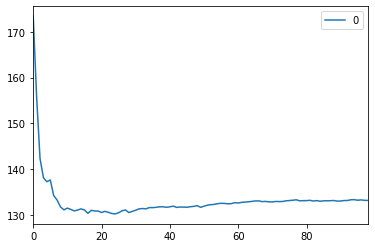

In [35]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [36]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,50)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_MM,y_train)
model.best_params_

{'n_neighbors': 20}